
# Project: Data Analysis on No-show medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we will be analyzing a dataset that includes records of over 100,000 medical appointments in Brazil. Specifically, we will be focused on the question of whether or not patients show up for their appointment and finally we will uncover trends and patterns by answering questions such as;

1. What are the characteristics associated with patients who do not shop up for their appointments?
2. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
3. Are patients not likely to attend associated with a certain kind of condition/health challenge? and so on.

> The dataset was gotten from [Kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments), and it include columns such as

* PatientId	
* AppointmentID	
* Gender	
* ScheduledDay	
* AppointmentDay	
* Age	
* Neighbourhood	
* Scholarship	
* Hipertension	
* Diabetes	
* Alcoholism	
* Handcap	
* SMS_received	
* No-show


In [14]:
# First lets import all packages we will use for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Now we are going to load and check the dataset for cleanliness and then perform all necessary alterations to make the dataset ready for analysis


### General Properties

Next, we are going to explore the  dataset by looking at some of the properties such as shape, summary statistics, columns, info and so on.

In [15]:
# Lets load our dataset using pandas.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [16]:
#Lets take a look at the shape of our dataset
df.shape

(110527, 14)

We can see that the dataset has a total of 110527 entries and 14 colums.

In [17]:
#Checking the summary statistics of our data.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


From the summary statistics we can observe the following;
*  Age- The mean age of pateints scheduled for appointment is around **37 years old**, the least age is -1(I think thats an error we'll check it out while cleaning), and the oldest patient is **115 years old**

*  Scholarship- The average number of patients with scholarship is about 9.8% of total patients
*  Herpertension- The average number of patients with Hypeternsion is about 19.7% of total patients

So we can deduce alot of information about the data from the summary statistics


In [18]:
# Let's look at some basic info about the data, such as data type, missing values etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning

In the cleaning process, we are going check for the following
* Missing values
* Duplicated data
* Data types etc.

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [19]:
# Let's check our dataset for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Wow!, luckily we have no missing values in the dataset

In [20]:
#Now Let's check for dupliacted data

sum(df.duplicated())

0

Again, no duplicated data!

## *Changing Datatypes*

In [21]:
# from the info about the data, we could see that the "ScheduledDay" and "AppointmentDay" have their data type as "object"
# so we need to change this to 'datetime' datatype

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [22]:
#now lets check the data types

df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

Now we have the data type in date time format

In [23]:
# Lets also change the data types for 'No-show' to numeric characters so we can analyse
df = df.replace({'No-show': {'Yes': 0, 'No': 1}})

In [24]:
#lets check it out
df['No-show']

0         1
1         1
2         1
3         1
4         1
         ..
110522    1
110523    1
110524    1
110525    1
110526    1
Name: No-show, Length: 110527, dtype: int64

This implies that:
> **0- They missed their appointment**

> **1- They attended their appointment**

In [25]:
# Lets replace hyphen with underscores and lowercase labels for on the dataset

df.rename(columns=lambda x: x.strip().lower().replace('-','_'), inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1


In [26]:
# We are probably not going to be using some columns in this analysis, its best to drop them
# Here are the list of columns to drop  'PatientId, AppointmentID'

df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)

In [27]:
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1


In [28]:
#RECALL that,we saw a row where the age was negative, lets look for the row, investigate and drop it if necessary

df.query('age==-1')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,1


In [29]:
#lets drop the row, because the age cannot be negative and its just 1 row
df.drop([99832], 0, inplace=True)

In [30]:
#Check again to confirm
df.query('age==-1')

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


<a id='eda'></a>
## Exploratory Data Analysis

> > Before we begin to answer some questions about the data, lets look at an overview by plotting a histogram

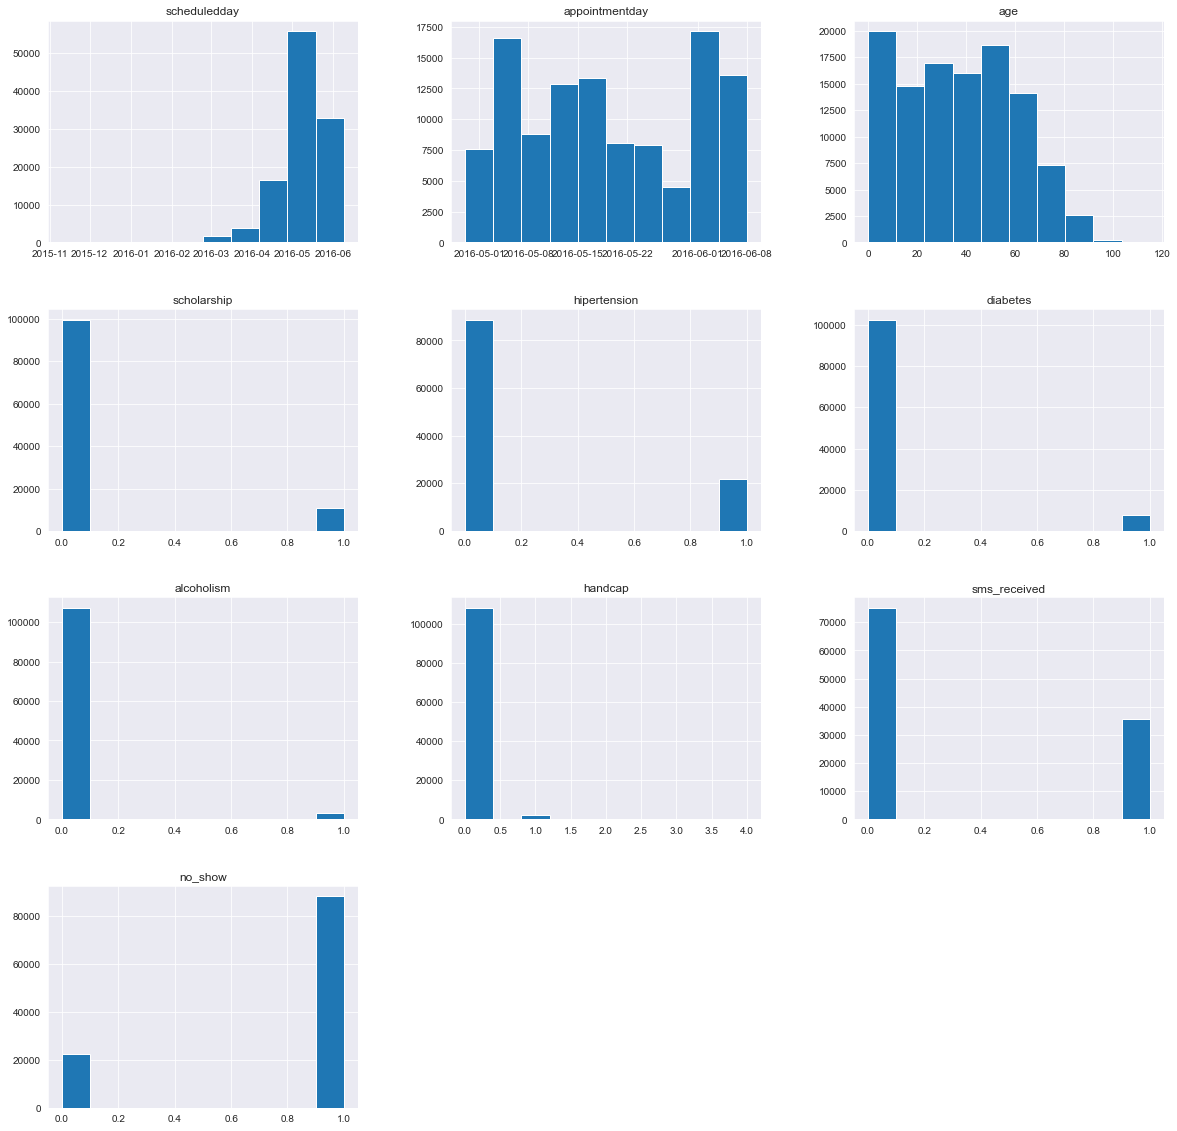

In [32]:
df.hist(figsize=(20,20))
sns.set_style("darkgrid");

## Now let's ask some Questions to help us discover trends

###  Question 1: Was SMS a factor that determined attendence by patients?

To answer this, we will plot a bivariate barchart to enable us determine what ratio of people who attended received an sms and what ratio did no

,no_show
sms_received,
0,0.832965
1,0.724255


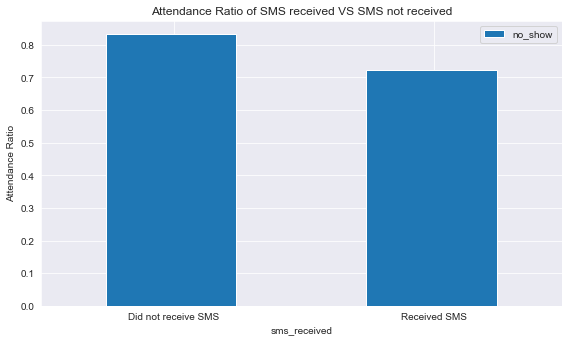

In [63]:
df.groupby(['sms_received'])[['no_show']].mean().plot(kind='bar',figsize=(8,6)).set_ylabel('Attendance Ratio')
plt.title('Attendance Ratio of SMS received VS SMS not received')
n_groups=2
index = np.arange(n_groups)
bar_width = 0.01
plt.xticks(index + bar_width, ('Did not receive SMS', 'Received SMS'))
plt.tight_layout()
plt.xticks(rotation=360)
df.groupby(['sms_received'])[['no_show']].mean()

We can see that more majority of patients who attended didnot received an SMS.

### Question 2 :  What Age group are more likely to attend an appointment than not?

we are going to check which age group is more likely to attend an appointment by plotting age against attendees and non-attendees

In [65]:
# Lets create masks so we can easily analyse characteristics of patients who attended and patients who did not

attended=df.no_show ==1
missed=df.no_show ==0

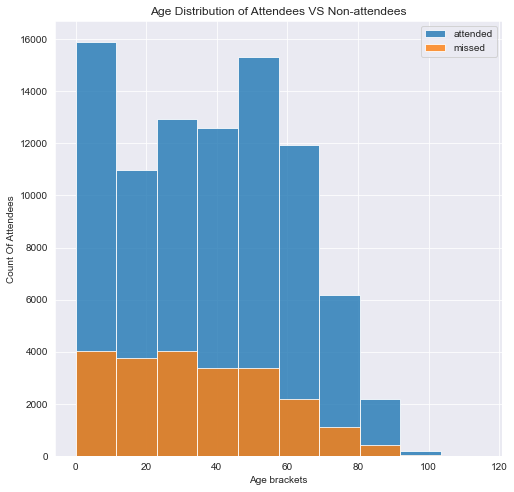

In [69]:
df.age[attended].hist(alpha=0.8,figsize=(8,8),bins= 10,label='attended')
df.age[missed].hist(alpha=0.8,bins= 10,label='missed')
plt.ylabel('Count Of Attendees')
plt.xlabel('Age brackets')
plt.title('Age Distribution of Attendees VS Non-attendees')
plt.legend();

The distribution above shows that older people are more likely to attend an appointment than younger people

### Question 3 :  How is having a scholarship associated with attendance?

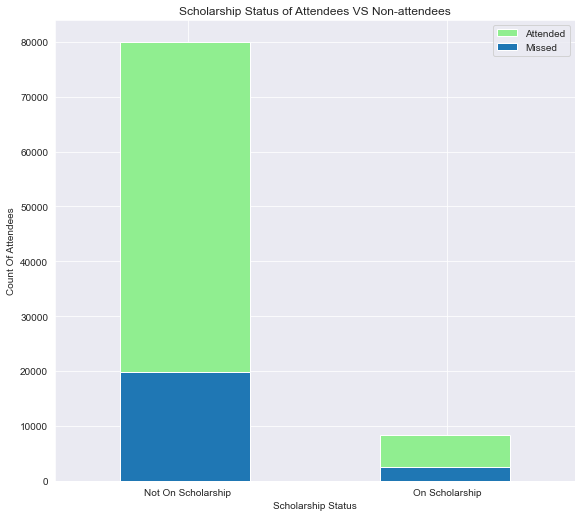

In [71]:
# Let's see how having a scholarship affects attending an appointment by plotting a barchart

df.scholarship[attended].value_counts().plot(kind='bar', figsize=(8,8),color='lightgreen',label='Attended')
df.scholarship[missed].value_counts().plot(kind='bar', figsize=(8,8), label= 'Missed')
n_groups=2
index = np.arange(n_groups)
bar_width = 0.01
plt.xticks(index + bar_width, ('Not On Scholarship', 'On Scholarship'))
plt.tight_layout()
plt.xticks(rotation=360)
plt.ylabel('Count Of Attendees')
plt.xlabel('Scholarship Status')
plt.title('Scholarship Status of Attendees VS Non-attendees')
plt.legend();

First of all we can see that we have more people without scholarship, than people with scholarships.
> For people without scholarship, we see alot more attending the medical appointment

> For people with scholarship, we see also more attending the medical appointment

### Question 4 :  Was Gender a factor that affected the attendance turnout?

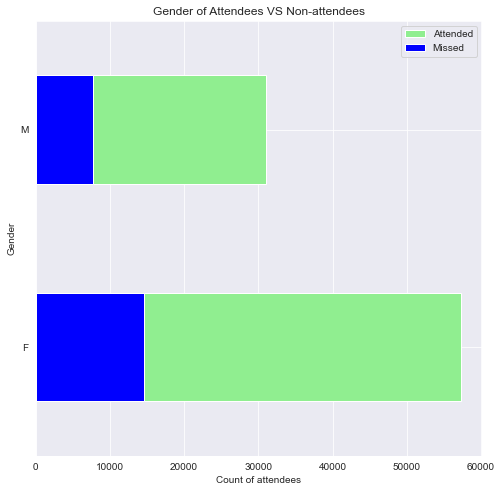

In [73]:
# We can do this by plotting the a bar graph of attendees and non attendees and then segregating by gender
df.gender[attended].value_counts().plot(kind='barh', figsize=(8,8),color='lightgreen',label='Attended');
df.gender[missed].value_counts().plot(kind='barh', figsize=(8,8),color='blue',label='Missed')
plt.ylabel('Gender')
plt.xlabel('Count of attendees')
plt.title('Gender of Attendees VS Non-attendees')
plt.legend();

Generally, Females appears to be much more than males and in the distribution, Females are more likely to attend an appointment than males.

### Question 5 :  How did attendance turnout change over time?

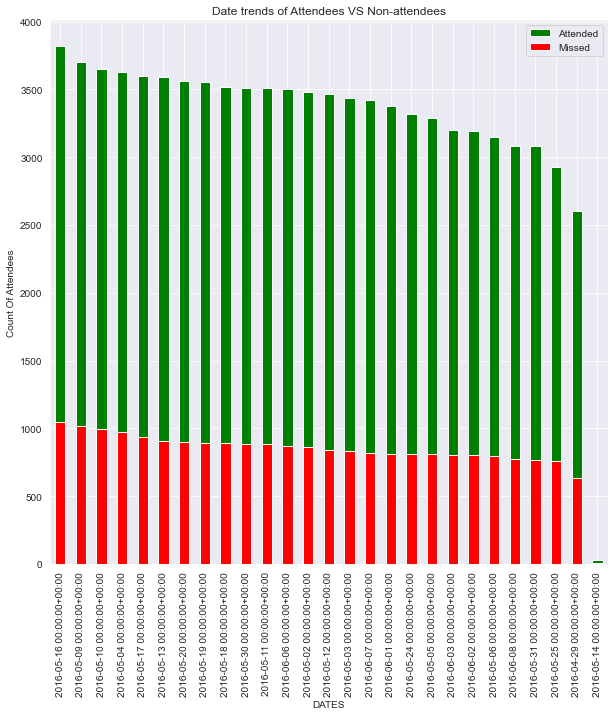

In [75]:
# Lets see how attaendance changed over time by using time as the dependent variable

df[attended].appointmentday.value_counts().plot(kind='bar', figsize=(10,10),color='green',label='Attended')
df[missed].appointmentday.value_counts().plot(kind='bar', figsize=(10,10),color='red',label='Missed')
plt.ylabel('Count Of Attendees')
plt.xlabel('DATES')
plt.title( 'Date trends of Attendees VS Non-attendees')
plt.legend();

We can see that Generally, More people started attending their meidical appointments as time goes on

<a id='conclusions'></a>
## Conclusions

> From the analysis carried on the dataset, the following inferences can be made

* More people became interested in attending their appointments as time goes on.
* A lot more older people attend appointments than yonger people.
* Females are likely to attend medical appointments than males.

In conclusion, an individual will most likely than not attend an appoint if he/she falls under 1 or more categories from the above.
One of the limitations on the dataset was that the 'No-show' values were store as string initially this was a challenge because string datatype cannot be used for statistical analysis.

# References 
Here as some links that were of great benefit to this project


[Renaming Columns in Pandas frame](https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas)

[More information about the dataset](https://www.kaggle.com/datasets/joniarroba/noshowappointments)